In [1]:
print("pip install -U skorch")

pip install -U skorch


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Skorch library import
from skorch import NeuralNetClassifier

import numpy as np

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn import datasets, model_selection

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
mnist = fetch_openml('mnist_784', version=1, data_home='./data/')

In [4]:
mnist_data = mnist.data / 255

pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


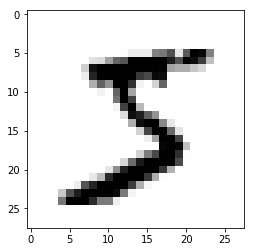

In [5]:
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

In [6]:
mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
train_size = 5000
test_size = 500

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size,test_size=test_size)

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_Y = train_Y.astype('int64')
test_Y = test_Y.astype('int64')

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=-1)

In [10]:
net = NeuralNetClassifier(
    Net,
    max_epochs=20,
    lr=0.1,
)

In [11]:
net.fit(train_X, train_Y)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9415       0.6683        1.4541  0.2022
      2        1.0653       0.7729        0.8484  0.1105
      3        0.6754       0.8187        0.6448  0.0991
      4        0.5252       0.8386        0.5519  0.2993
      5        0.4475       0.8496        0.4994  0.1175
      6        0.4000       0.8635        0.4658  0.0988
      7        0.3676       0.8705        0.4424  0.1000
      8        0.3435       0.8745        0.4248  0.1173
      9        0.3245       0.8755        0.4113  0.0990
     10        0.3087       0.8755        0.4001  0.0990
     11        0.2952       0.8785        0.3908  0.1142
     12        0.2833       0.8825        0.3829  0.0607
     13        0.2726       0.8865        0.3760  0.0574
     14        0.2629       0.8924        0.3699  0.0572
     15        0.2538       0.8944        0.3647  0.0572
     16        0.2454       0.8

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=784, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=10, bias=True)
  ),
)

In [12]:
pred = net.predict(test_X)
accuracy = np.mean(pred == test_Y)
accuracy

0.886